In [24]:
# all necessary imports here
import pandas as pd
#sklearn stuff
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [25]:
#Data Collection
#Not sure why I had two separate files, but whoopdidoodie
ticker = 'AAPL'
df = pd.read_csv(f'{ticker}_Data.csv')
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume
0,2024-11-29,234.810,237.8100,233.9700,237.33,28481377
1,2024-11-27,234.465,235.6900,233.8101,234.93,33498439
2,2024-11-26,233.330,235.5700,233.3300,235.06,45986189
3,2024-11-25,231.460,233.2450,229.7400,232.87,90152832
4,2024-11-22,228.060,230.7199,228.0600,229.87,38168252


In [26]:
# Data Cleaning

#Reindex so that 0 is earliest

df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

df = df.iloc[::-1].reset_index(drop=True)

df['Date'] = pd.to_datetime(df['Date'])

"""I didn't account for stock splits!
 4-for-1 basis on August 28, 2020, 
7-for-1 basis on June 9, 2014, 
split on a 2-for-1 basis on February 28, 2005, June 21, 2000
"""
stock_splits = {dt(2020, 8, 29): 4, 
                dt(2014,6,9):7,
                dt(2005,2,28):2,
                dt(2001,6,21):2}
for day, factor in stock_splits.items():
    df.loc[df['Date'] < day, ['Open', 'High', 'Low', 'Close']] /= factor
    df.loc[df['Date'] < day, 'Volume'] *= factor
#NOTE: had to move 4-split back by one day in order for it to work; if I made < into <=, it would cause a similar spike somewhere else

df.head()

,Date,Open,High,Low,Close,Volume
0,1999-11-01,0.714286,0.720446,0.690804,0.693036,278577600
1,1999-11-02,0.696429,0.729375,0.690268,0.716518,399235200
2,1999-11-03,0.728750,0.743304,0.723214,0.727679,328462400
3,1999-11-04,0.732679,0.762232,0.719821,0.746607,379086400
4,1999-11-05,0.755536,0.789018,0.750000,0.788482,416808000


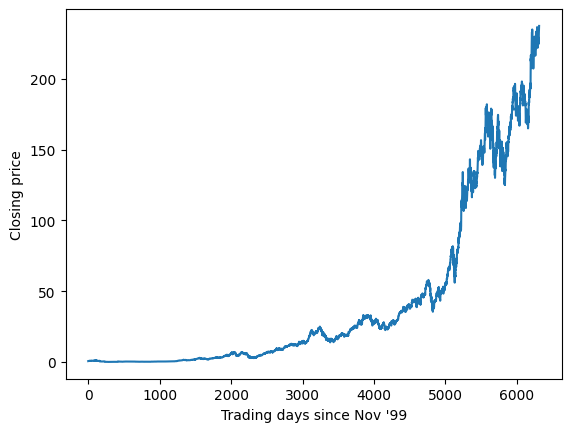

In [27]:
# Data Visualization
plt.xlabel('Trading days since Nov \'99')
plt.ylabel('Closing price')
days = []
closes = []
for i in list(df.index):
    days.append(i)
    closes.append(df.loc[i, 'Close'])
    if df.loc[i,"Close"]> 400:
        print(df.loc[i])
        break
plt.plot(days, closes)
plt.show()
#Shows Close price over time
#Now to show other things!

In [28]:
# Data Preprocessing

#Normalization stuff, choose standard normalizer

#feature engineering: add some finance things

In [29]:
# Data Modeling

In [30]:
# Data Analysis